# Tutorial 7

Solve the following non-linear equation with roots $x = -2$ and $x \approx 1.75488$, without computing analytically its first derivative.
$$ -x^4 +3x^2 - x + 2 = 0 $$
Remember that the secant method approximates the derivative using finit differences. The modified Newton's method is the following:
$$ f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}} $$
$$ x_{i+1} = x_i - f(x_i)\frac{x_i - x_{i-1}}{f(x_i)-f(x_{i-1})}

1. Solve the non-linear equation above using the secant method with $x_0 = -2.5$ and $x_1 = -2.2$.

In [3]:
function f(x)
    return -x^4 + 3x^2 - x + 2
end

function secant_func(f, x0, x1; tol=1e-6, max_iter=100)
    xi_minus_1 = x0
    xi = x1

    for i in 1:max_iter
        f_xi = f(xi)
        f_xi_minus_1 = f(xi_minus_1)
        
        xi_plus_1 = xi - f_xi * (xi - xi_minus_1) / (f_xi - f_xi_minus_1)
        
        if abs(xi_plus_1 - xi) < tol
            return xi_plus_1, i
        end
        
        xi_minus_1 = xi
        xi = xi_plus_1
    end
end

x0 = -2.5
x1 = -2.2

root, iterations = secant_func(f, x0, x1)
println("Root found: $root after $iterations iterations")


Root found: -2.0000000000002784 after 6 iterations


2. Compute the theoretical limit of the error convergence for the secant method. Use $m_1 = 3.5$ and $M_2 = 69$.

Note: Remember that the secant method converges more slowly than the pure Newton's method.
$$|x_{i+1} - x^*| \leq e|x_i - x^*|^\phi \; where \; \phi = \frac{\sqrt{5} + 1}{2}$$

In [16]:
function modified_newton_conv(f, x0, x1, x_star; tol=1e-6, max_iter=100)
    iter = 1
    x_hist = [x0, x1]
    x_old = x0
    x_new = x1

    while iter <= max_iter && abs(x_new - x_old) >= tol
        f_x_new = f(x_new)
        f_x_old = f(x_old)

        x_next = x_new - f_x_new * (x_new - x_old) / (f_x_new - f_x_old)
        
        push!(x_hist, x_next)
        x_old = x_new
        x_new = x_next
        iter += 1
    end
    return x_hist
end

x_star = -2

x_history = modified_newton_conv(f, x0, x1, x_star)

n = 1:length(x_history)
err = abs.(x_history .- x_star)

m1 = 3.5
M2 = 69
phi = (sqrt(5) + 1) / 2
e = M2 / (2 * m1)
display(e)
err_lim = e * (err[1:end-1]) .^ phi


9.857142857142858

7-element Vector{Float64}:
 3.2112512483667373
 0.7291112957499238
 0.1424333219581845
 0.009230505974945562
 0.0001420876686827306
 1.5382626625247866e-7
 2.6039874937620556e-12

3. Plot the numerical error of the solutions of the Newton method, the theoretical limit for the secant method (with convergence $\phi$), and the theoretical limit for the ordinary Newton's method (with convergence 2). Use the log scale on the y-axis.

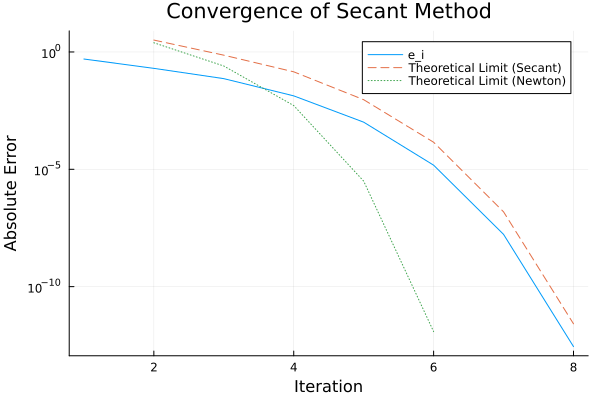

In [18]:
using Plots

function newton_conv(f, df, x0, max_iter, tol)
    iter = 1
    x_hist = [x0]
    x_new = x0

    while iter <= max_iter && abs(f(x_new)) >= tol
        x_new = x_new - f(x_new) / df(x_new)
        push!(x_hist, x_new)
        iter += 1
    end
    return x_hist
end

df(x) = -4x^3 + 6x - 1
x_history_newton = newton_conv(f, df, x0, 100, 1e-6)


n_newton = 1:length(x_history_newton)
err_newton = abs.(x_history_newton .- x_star)

err_lim_newton = e*(err_newton[1:end-1]) .^ 2


if err[end] == 0.0
    err[end] = 1e-24
end

if err_newton[end] == 0.0
    err_newton[end] = 1e-24
end

p = plot(n, err, yscale=:log10, xlabel="Iteration", ylabel="Absolute Error", label="e_i", title="Convergence of Secant Method")
plot!(n[2:end], err_lim, linestyle=:dash, label="Theoretical Limit (Secant)")
plot!(n_newton[2:end], err_lim_newton, linestyle=:dot, label="Theoretical Limit (Newton)")

display(p)
